<a href="https://colab.research.google.com/github/RaminTK/PATH/blob/main/Mar5_PATH_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import json
import folium


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, time
from copy import deepcopy as dc
from google.colab import drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
G = nx.Graph()

G.add_node("Station_A")
G.add_node("Station_B")

G.add_edge("Station_A", "Station_B")

In [ ]:
coords = [
    [40.7344, -74.1642],
    [40.739187, -74.155425],
    [40.726676, -74.034757],
    [40.732141, -74.063114],
    [40.719671, -74.043117],
    [40.7357, -74.0290],
    [40.73421, -73.998944],
    [40.737393, -73.996862],
    [40.749111, -73.98824],
    [40.742893, -73.992865],
    [40.73300, -74.00689],
    [40.71186, -74.01193],
    [40.71673, -74.03247]
]

In [ ]:
with open('drive/MyDrive/path/nyu-2451-60069-geojson.json', 'r') as file:
    train_routes_data = json.load(file)

In [ ]:
# Create a map centered on the NJ-NY PATH area
m = folium.Map(location=[40.71659425039155, -74.03128651433627], zoom_start=12)

# Add the train routes to the map using GeoJson
folium.GeoJson(train_routes_data).add_to(m)
for i, coord in enumerate(coords):
    folium.Marker(coord, popup=f"Point {i+1}").add_to(m)
# Display the map
m

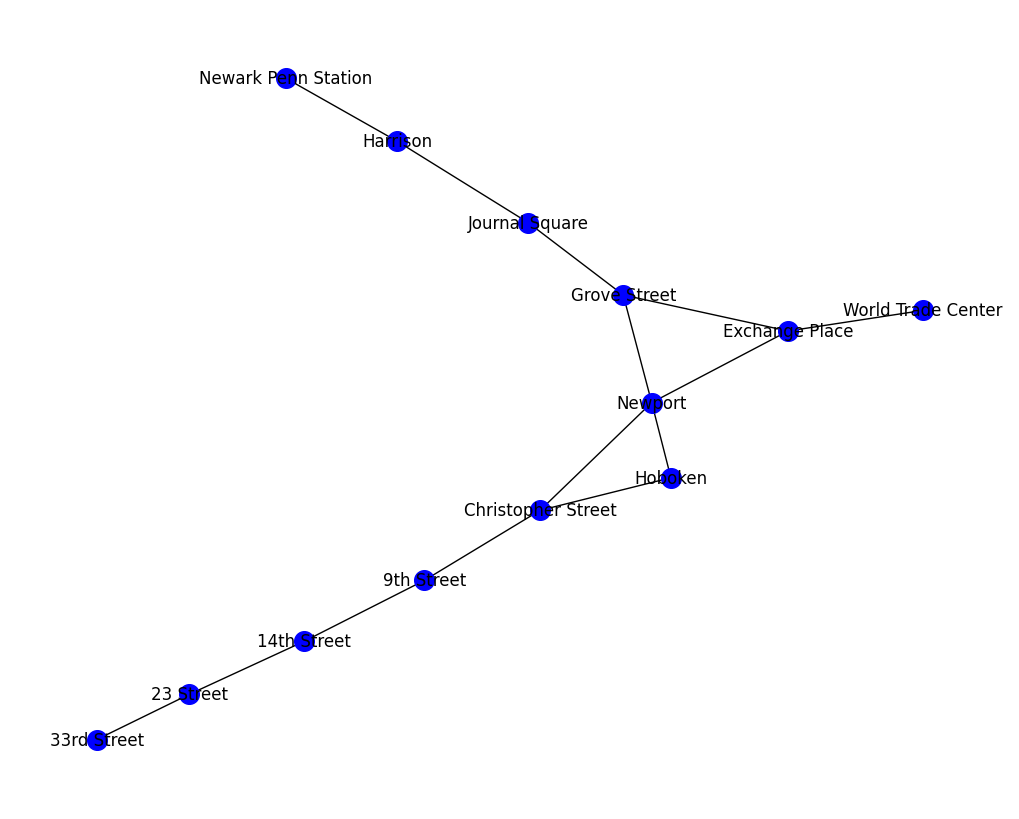

In [ ]:


# Initialize an empty graph
G = nx.Graph()

# Define nodes
nodes = [
    'Newark Penn Station',
    'Harrison',
    'Newport',
    'Journal Square',
    'Grove Street',
    'Hoboken',
    '9th Street',
    '14th Street',
    '33rd Street',
    '23 Street',
    'Christopher Street',
    'World Trade Center',
    'Exchange Place'
]

# Add nodes to the graph
G.add_nodes_from(nodes)

# Define edges for each line
edges = {
    'blue': [
        ('Hoboken', 'Christopher Street'),
        ('Christopher Street', '9th Street'),
        ('9th Street', '14th Street'),
        ('14th Street', '23 Street'),
        ('23 Street', '33rd Street')
    ],
    'green': [
        ('World Trade Center', 'Exchange Place'),
        ('Exchange Place', 'Newport'),
        ('Newport', 'Hoboken')
    ],
    'orange': [
        ('Journal Square', 'Grove Street'),
        ('Grove Street', 'Newport'),
        ('Newport', 'Christopher Street'),
        ('Christopher Street', '9th Street'),
        ('9th Street', '14th Street'),
        ('14th Street', '23 Street'),
        ('23 Street', '33rd Street')
    ],
    'red': [
        ('World Trade Center', 'Exchange Place'),
        ('Exchange Place', 'Grove Street'),
        ('Grove Street', 'Journal Square'),
        ('Journal Square', 'Harrison'),
        ('Harrison', 'Newark Penn Station',)
    ]
}


edge_weights = {}
for color, edgee in edges.items():
    for edge in edgee:
        # Ensure that the edge is represented consistently as a tuple
        sorted_edge = tuple(sorted(edge))
        if sorted_edge not in edge_weights:
            edge_weights[sorted_edge] = 0
        edge_weights[sorted_edge] += 1


for edge, weight in edge_weights.items():
    G.add_edge(edge[0], edge[1], weight=weight)
# # Add edges to the graph
# for line_edges in edges.values():
#     G.add_edges_from(line_edges)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, node_color='blue', node_size=200)
plt.show()


In [ ]:
# Define the list of stations
stations = ["Hoboken", "Newport", "Exchange Place", "Grove Street", "Journal Square", "Harrison", "Newark", "WTC", "33rd Street", "23rd Street", "14th Street", "9th Street", "Christopher"]

# Define the list of hours
temp = ['12:00:00 AM', '1:00:00 AM', '2:00:00 AM', '3:00:00 AM', '4:00:00 AM', '5:00:00 AM', '6:00:00 AM', '7:00:00 AM', '8:00:00 AM', '9:00:00 AM', '10:00:00 AM', '11:00:00 AM', '12:00:00 PM', '1:00:00 PM', '2:00:00 PM', '3:00:00 PM', '4:00:00 PM', '5:00:00 PM', '6:00:00 PM', '7:00:00 PM', '8:00:00 PM', '9:00:00 PM', '10:00:00 PM', '11:00:00 PM']
hours = [datetime.strptime(hour, "%I:%M:%S %p").time() for hour in temp]

# Define the entry and exit data for each station
data = {
    "Hoboken": {
        "entry": [24, 10, 9, 5, 19, 81, 806, 2819, 4509, 1721, 626, 473, 390, 344, 319, 365, 500, 851, 748, 412, 223, 158, 101, 62],
        "exit": [121, 102, 28, 33, 20, 44, 182, 246, 442, 409, 253, 276, 308, 387, 522, 975, 1832, 3502, 2794, 1514, 925, 748, 618, 418]
    },
    "Newport": {
        "entry": [8, 5, 2, 2, 5, 48, 218, 816, 1821, 1046, 487, 383, 335, 321, 325, 442, 968, 1541, 838, 394, 226, 113, 64, 28],
        "exit": [105, 46, 17, 12, 9, 29, 180, 246, 442, 409, 253, 276, 308, 387, 522, 975, 1832, 3502, 2794, 1514, 925, 748, 618, 418]
    },
    "Exchange Place": {
        "entry": [15, 8, 3, 5, 8, 66, 321, 1013, 1795, 843, 334, 262, 226, 208, 216, 310, 731, 1065, 564, 250, 122, 72, 44, 25],
        "exit": [143, 60, 16, 19, 15, 80, 274, 570, 1095, 640, 228, 206, 226, 269, 355, 534, 843, 1357, 1425, 856, 568, 385, 318, 168]
    },

    "Grove Street": {
        "entry": [19, 9, 5, 7, 15, 113, 616, 1846, 3452, 1781, 738, 525, 434, 403, 367, 404, 550, 839, 731, 398, 223, 160, 128, 75],
        "exit": [225, 85, 41, 21, 18, 41, 172, 408, 448, 328, 247, 284, 323, 396, 514, 810, 1199, 2324, 2778, 1820, 1154, 997, 697, 406]
    },

    "Journal Square": {
        "entry": [26, 17, 12, 40, 115, 512, 1189, 2499, 3282, 1852, 993, 773, 685, 727, 714, 836, 859, 892, 613, 371, 248, 193, 144, 64],
        "exit": [373, 156, 151, 77, 99, 178, 316, 377, 390, 371, 323, 348, 428, 500, 578, 813, 1177, 1773, 1981, 1414, 1111, 979, 834, 525]
    },

    "Newport": {
        "entry": [8, 5, 2, 2, 5, 48, 218, 816, 1821, 1046, 487, 383, 335, 321, 325, 442, 968, 1541, 838, 394, 226, 113, 64, 28],
        "exit": [105, 46, 17, 12, 9, 29, 180, 246, 442, 409, 253, 276, 308, 387, 522, 975, 1832, 3502, 2794, 1514, 925, 748, 618, 418]
    },
    "Harrison": {
        "entry": [2, 2, 1, 7, 33, 195, 456, 1115, 1347, 588, 210, 142, 133, 120, 113, 111, 142, 179, 113, 53, 31, 30, 18, 11],
        "exit": [58, 31, 14, 7, 8, 21, 46, 66, 62, 51, 58, 47, 70, 74, 116, 203, 384, 600, 676, 393, 251, 183, 143, 93]
    },

    "Newark": {
        "entry": [33, 30, 20, 42, 84, 522, 1174, 3007, 2828, 1033, 394, 379, 330, 311, 334, 418, 706, 865, 537, 296, 216, 214, 107, 61],
        "exit": [155, 147, 78, 59, 112, 227, 506, 833, 953, 723, 354, 363, 417, 506, 641, 1070, 2252, 3411, 2552, 1254, 756, 538, 406, 281]
        },

    "WTC": {
        "entry": [306, 131, 66, 57, 56, 131, 362, 925, 1471, 781, 469, 519, 669, 835, 1178, 2238, 4767, 7509, 5122, 2778, 1825, 1140, 789, 524],
        "exit": [109, 46, 39, 52, 217, 791, 3227, 6339, 10163, 6113, 2150, 1540, 1271, 1181, 1227, 1383, 1637, 2352, 1891, 1136, 677, 552, 472, 242]
        },

    "33rd Street": {
        "entry": [223, 97, 61, 42, 35, 59, 189, 579, 743, 347, 235, 271, 347, 420, 574, 983, 1809, 3568, 3007, 1660, 1136, 897, 751, 440],
        "exit": [39, 21, 28, 27, 39, 98, 678, 1508, 2910, 2358, 884, 735, 585, 499, 476, 532, 737, 986, 847, 479, 299, 258, 206, 82]
        },

    "23rd Street": {
        "entry": [1, 0, 0, 0, 1, 5, 15, 76, 156, 76, 66, 78, 105, 131, 179, 313, 569, 1107, 962, 537, 357, 269, 157, 77],
        "exit": [5, 1, 2, 2, 3, 38, 187, 526, 1233, 889, 302, 214, 174, 153, 171, 183, 208, 336, 294, 162, 114, 79, 76, 40]
    },
    "14th Street": {
        "entry": [86, 36, 20, 7, 7, 18, 46, 135, 235, 127, 80, 92, 119, 156, 216, 389, 534, 800, 676, 469, 359, 283, 221, 150],
        "exit": [44, 20, 21, 16, 24, 67, 301, 592, 1029, 879, 420, 331, 306, 280, 264, 337, 361, 508, 512, 319, 202, 159, 147, 78]
    },
    "9th Street": {
        "entry": [7, 2, 2, 0, 1, 4, 15, 49, 89, 62, 48, 58, 82, 102, 136, 216, 308, 423, 403, 360, 352, 321, 191, 114],
        "exit": [10, 2, 4, 2, 3, 20, 89, 286, 443, 547, 340, 249, 271, 264, 216, 239, 290, 351, 370, 217, 132, 108, 79, 47]
    },
    "Christopher": {
        "entry": [51,23, 16, 6, 4, 3, 15, 47, 121, 76, 40, 47, 59, 76, 119, 220, 339, 515, 419, 275, 205, 183, 154, 115],
        "exit": [15,8, 5, 9, 6, 19, 133, 239, 634, 524, 215, 132, 116, 100, 108, 115, 123, 226, 249, 171, 93, 51, 44, 32]
    }}


In [ ]:
# Initialize dictionaries for entry and exit data
entry_data = {}
exit_data = {}

# Loop over the stations in the data
for station in data:
    # Add the entry and exit data for the current station to the respective dictionaries
    entry_data[station] = data[station]["entry"]
    exit_data[station] = data[station]["exit"]

# Convert the dictionaries to dataframes
entry_df = pd.DataFrame(entry_data, index=hours)
exit_df = pd.DataFrame(exit_data, index=hours)

In [ ]:
shortage = exit_df.sum().sum() - entry_df.sum().sum()
shortage

22650

In [ ]:
data = 'drive/MyDrive/path/times.xlsx'
timedf = []
for i in range(10):
  timedf.append(pd.read_excel(data, sheet_name=f'Sheet{i+1}'))

In [ ]:
idx = 0
for i in range(len(timedf)):
  idxx = list(range(idx,idx+len(timedf[i])))
  idx += len(timedf[i])
  timedf[i] = timedf[i].rename(index = dict(zip(timedf[i].index.tolist(), idxx)))

In [ ]:
train = []
for ele in timedf:
  train.append(len(ele))
train = list(range(sum(train)))
trains = np.zeros(len(train))

In [ ]:
raw_timedf = dc(timedf)
timedf2 = dc(timedf)

In [ ]:
for d in range(len(timedf)):
  timedf[d] = timedf[d].drop(timedf[d].columns[-1], axis=1)

for d in range(len(timedf2)):
  timedf2[d] = timedf2[d].drop(timedf2[d].columns[0], axis=1)

In [ ]:
times = exit_df.index.tolist()
times.append(time(23, 59, 59))

enTable = pd.DataFrame(index=range(len(train)), columns=stations )
exTable = pd.DataFrame(index=range(len(train)), columns=stations )

In [ ]:
for t in range(24):
  for station in stations:
    temp = []
    for ele in timedf:
      if station in ele:
        temp.append(ele[station][ele[station].apply(lambda x: (x != '---') and times[t] <= x < times[t+1])].index.tolist())
        value_count = [len(sublist) for sublist in temp]
        flat_list = [value for sublist in temp for value in sublist]
    quotient = entry_df.at[times[t], station] // len(flat_list)
    remainder = entry_df.at[times[t], station] % len(flat_list)
    new_value = [quotient] * (len(flat_list) - remainder) + [quotient + 1] * remainder
    for x in range(len(flat_list)):
      enTable.at[flat_list[x], station] = new_value[x]

<ipython-input-301-a5622dbfb076>:9: RuntimeWarning: divide by zero encountered in long_scalars
  quotient = entry_df.at[times[t], station] // len(flat_list)
<ipython-input-301-a5622dbfb076>:10: RuntimeWarning: divide by zero encountered in long_scalars
  remainder = entry_df.at[times[t], station] % len(flat_list)


In [ ]:
for t in range(24):
  for station in stations:
    temp = []
    for ele in timedf2:
      if station in ele:
        temp.append(ele[station][ele[station].apply(lambda x: (x != '---') and times[t] <= x < times[t+1])].index.tolist())
        value_count = [len(sublist) for sublist in temp]
        flat_list = [value for sublist in temp for value in sublist]
    quotient = exit_df.at[times[t], station] // len(flat_list)
    remainder = exit_df.at[times[t], station] % len(flat_list)
    new_value = [quotient] * (len(flat_list) - remainder) + [quotient + 1] * remainder
    for x in range(len(flat_list)):
      exTable.at[flat_list[x], station] = new_value[x]

<ipython-input-302-49a77494173c>:9: RuntimeWarning: divide by zero encountered in long_scalars
  quotient = exit_df.at[times[t], station] // len(flat_list)
<ipython-input-302-49a77494173c>:10: RuntimeWarning: divide by zero encountered in long_scalars
  remainder = exit_df.at[times[t], station] % len(flat_list)


In [ ]:
enTable = enTable.fillna(0)
exTable = exTable.fillna(0)

In [ ]:
i = 0
enTable.loc[raw_timedf[i].index, raw_timedf[i].columns].cumsum(axis = 1) - exTable.loc[raw_timedf[i].index, raw_timedf[i].columns].cumsum(axis = 1)

,Newark,Harrison,Journal Square,Grove Street,Exchange Place,WTC
0,33,14,-35,-65,-107,-161
1,15,5,-29,-40,-58,-104
2,15,6,-22,-28,-32,-51
3,20,16,-12,-18,-22,-42
4,21,21,15,13,8,-44
...,...,...,...,...,...,...
133,27,11,-41,-76,-94,-153
134,27,11,-41,-76,-94,-153
135,27,11,-41,-71,-89,-149
136,30,14,-63,-94,-112,-172


In [ ]:
inCommuter = enTable.loc[raw_timedf[i].index, raw_timedf[i].columns]

In [ ]:
outCommuter = exTable.loc[raw_timedf[i].index, raw_timedf[i].columns]

In [ ]:
enTable = enTable.fillna(0)
exTable = exTable.fillna(0)

In [ ]:
i = 0
a = enTable.loc[raw_timedf[i].index, raw_timedf[i].columns].sum(axis = 1) - exTable.loc[raw_timedf[i].index, raw_timedf[i].columns].sum(axis = 1)
weights = enTable.loc[raw_timedf[i].index, raw_timedf[i].columns[0:-1]].sum()/enTable.loc[raw_timedf[i].index, raw_timedf[i].columns[0:-1]].sum().sum()
distributed_values = np.round(a.values[:, None] * np.array(weights)).astype(int)
df_distributed = pd.DataFrame(np.column_stack(distributed_values).T,index = raw_timedf[i].index, columns=raw_timedf[i].columns[0:-1].values)
enTable.loc[raw_timedf[i].index, raw_timedf[i].columns[0:-1]] -= df_distributed
enTable.loc[raw_timedf[i].index, raw_timedf[i].columns[0]] -= (enTable.loc[raw_timedf[i].index, raw_timedf[i].columns].cumsum(axis = 1) - exTable.loc[raw_timedf[i].index, raw_timedf[i].columns].cumsum(axis = 1))[raw_timedf[i].columns[-1]]
net = enTable.loc[raw_timedf[i].index, raw_timedf[i].columns].cumsum(axis = 1) - exTable.loc[raw_timedf[i].index, raw_timedf[i].columns].cumsum(axis = 1)
net

,Newark,Harrison,Journal Square,Grove Street,Exchange Place,WTC
0,114,110,93,82,54,0
1,67,67,54,55,46,0
2,41,37,19,19,19,0
3,41,41,21,20,20,0
4,43,47,50,53,52,0
...,...,...,...,...,...,...
133,104,102,81,64,59,0
134,104,102,81,64,59,0
135,102,100,78,65,60,0
136,117,117,74,63,60,0


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

G = nx.Graph()

nodes = [
    'Newark Penn Station',
    'Harrison',
    'Newport',
    'Journal Square',
    'Grove Street',
    'Hoboken',
    '9th Street',
    '14th Street',
    '33rd Street',
    '23 Street',
    'Christopher Street',
    'World Trade Center',
    'Exchange Place'
]

# Add nodes to the graph
G.add_nodes_from(nodes)

# Define edges for each line
edges = {
    'blue': [
        ('Hoboken', 'Christopher Street'),
        ('Christopher Street', '9th Street'),
        ('9th Street', '14th Street'),
        ('14th Street', '23 Street'),
        ('23 Street', '33rd Street')
    ],
    'green': [
        ('World Trade Center', 'Exchange Place'),
        ('Exchange Place', 'Newport'),
        ('Newport', 'Hoboken')
    ],
    'orange': [
        ('Journal Square', 'Grove Street'),
        ('Grove Street', 'Newport'),
        ('Newport', 'Christopher Street'),
        ('Christopher Street', '9th Street'),
        ('9th Street', '14th Street'),
        ('14th Street', '23 Street'),
        ('23 Street', '33rd Street')
    ],
    'red': [
        ('World Trade Center', 'Exchange Place'),
        ('Exchange Place', 'Grove Street'),
        ('Grove Street', 'Journal Square'),
        ('Journal Square', 'Harrison'),
        ('Harrison', 'Newark Penn Station',)
    ]
}

for line_edges in edges.values():
    G.add_edges_from(line_edges)


In [ ]:
# Sample data: replace this with your actual DataFrame data
entries = inCommuter

exits = inCommuter

in_transit = net

# Simulate passenger flow for the red line
for i in range(len(entries)):
    for station in entries.columns:
        # Update the in_transit data based on entries and exits
        in_transit.at[i, station] += entries.at[i, station] - exits.at[i, station]

        # This is a simplistic approach and assumes that all passengers exiting and entering are immediately reflected in the in_transit data. In reality, you'd need to account for train movement and dwell times.


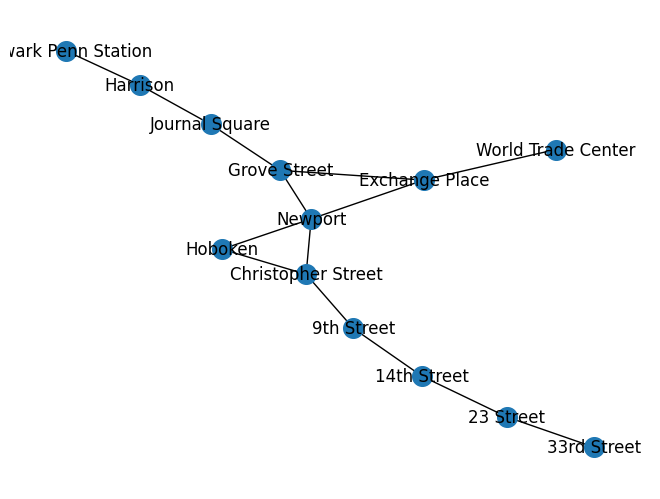

In [ ]:

pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200)
plt.show()


In [ ]:
inCommuter

,Newark,Harrison,Journal Square,Grove Street,Exchange Place,WTC
0,33,0,4,2,5,0
1,15,0,5,1,2,0
2,15,1,2,0,1,0
3,20,0,2,1,1,0
4,21,2,13,1,1,0
...,...,...,...,...,...,...
133,27,2,12,8,2,0
134,27,2,12,8,2,0
135,27,2,12,6,3,0
136,30,2,10,6,3,0


In [ ]:
outCommuter

,Newark,Harrison,Journal Square,Grove Street,Exchange Place,WTC
0,0,19,53,32,47,54
1,0,10,39,12,20,46
2,0,10,30,6,5,19
3,0,4,30,7,5,20
4,0,2,19,3,6,52
...,...,...,...,...,...,...
133,0,18,64,43,20,59
134,0,18,64,43,20,59
135,0,18,64,36,21,60
136,0,18,87,37,21,60


('Grove Street', 'Exchange Place')

In [ ]:
totalTime = []
for i in range(1010):
  data = dc(inCommuter)
  data2 = dc(outCommuter)

  df = pd.DataFrame(data)
  df2 = pd.DataFrame(data2)

  disruptionDuration = np.random.randint(1,11)

  start_num = np.random.randint(0, 138 - disruptionDuration)

  AffectedTrains = np.arange(start_num, start_num + disruptionDuration)

  dusruptedStation = np.random.choice(df.columns)

  index = list(df.columns).index(dusruptedStation)
  if index == len(df.columns) - 1:
      next = df.columns[index - 1]
  else:
      next = df.columns[index + 1]


  if dusruptedStation == 'WTC':
    continue
  # df.loc[AffectedTrains[-1]+1, dusruptedStation]
  lostTime = sum(df.loc[AffectedTrains, dusruptedStation]) + sum(df2.loc[AffectedTrains, dusruptedStation])/2

  if AffectedTrains[-1] == len(data) - 1:
    df.loc[0, dusruptedStation] += df.loc[AffectedTrains, dusruptedStation].sum()
  else:
    df.loc[AffectedTrains[-1]+1, dusruptedStation] += df.loc[AffectedTrains, dusruptedStation].sum()
    # df2.loc[AffectedTrains[-1]+1, dusruptedStation] += df2.loc[AffectedTrains, dusruptedStation].sum()

  df.loc[AffectedTrains, dusruptedStation] = 0
  # df2.loc[AffectedTrains, dusruptedStation] = 0



  values_to_add = df2.loc[AffectedTrains, dusruptedStation].values

  # Add those values to the 'next' column
  df2.loc[AffectedTrains, next] += values_to_add

  # Now that we've used the values to increment the 'next' column, set 'dusruptedStation' to zero
  df2.loc[AffectedTrains, dusruptedStation] = 0




  Newark =  [np.random.uniform(69,95)] #69
  Harrison = [np.random.uniform(72,100)] #72
  journal = [np.random.uniform(42,55)] #42
  grove = [np.random.uniform(20,40)] #20
  exchange = [np.random.uniform(22,45)] #22



  Newark =  [np.random.uniform(27,58)]
  Harrison = [np.random.uniform(23,54)]
  journal = [np.random.uniform(19,55)]
  grove = [np.random.uniform(20,47)]
  exchange = [np.random.uniform(17,48)]


  time = 0
  if dusruptedStation == "Newark":
    time = np.average(Newark) * lostTime
  elif dusruptedStation == 'Harrison':
    time = np.average(Harrison) * lostTime
  elif dusruptedStation == 'Journal Square':
    time = np.average(journal) * lostTime
  elif dusruptedStation == 'Grove Street':
    time = np.average(grove) * lostTime
  elif dusruptedStation == 'Exchange Place':
    time = np.average(exchange) * lostTime
  # else:
  #   time = 0

  totalTime.append(time)

In [ ]:
data3 = dc(outCommuter)
df3 = pd.DataFrame(data3)

In [ ]:
df3.loc[70:80,next]

'Exchange Place'

In [ ]:
values_to_add



array([28, 28, 28, 40])

71    0
72    0
73    0
74    0
75    0
76    0
77    0
Name: Grove Street, dtype: int64

In [ ]:
df2.loc[70:80,next]

70    23
71    23
72    23
73    31
74    31
75    31
76    22
77    22
78    22
79    22
80    22
Name: Exchange Place, dtype: int64

In [ ]:
dusruptedStation,AffectedTrains

('Grove Street', array([70, 71, 72, 73]))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


95% confidence interval for the solution is: 14784.203612332038 18097.678086046442


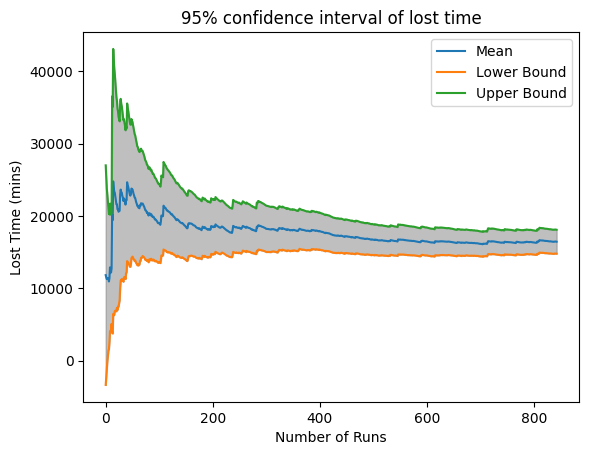

In [ ]:
Total = totalTime
NUM_RUNS = len(Total)
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# for i in range(21):
mean =  np.array([np.mean(Total[0:i]) for i in range(NUM_RUNS)])
UB,LB = mean + 1.96*np.array([stats.sem(Total[0:i]) for i in range(NUM_RUNS)]) ,mean - 1.96*np.array([stats.sem(Total[0:i]) for i in range(NUM_RUNS)])
mean = mean[10:]
UB = UB[10:]
LB = LB[10:]
# plt.figure(figsize=(15, 10))
plt.figure()
plt.plot(range(NUM_RUNS-10), mean, label="Mean")

plt.plot(range(NUM_RUNS-10), LB, label="Lower Bound")
plt.plot(range(NUM_RUNS-10), UB, label="Upper Bound")

# Shading the area between LB and UB
plt.fill_between(range(NUM_RUNS-10), LB, UB, color='gray', alpha=0.5)

plt.xlabel("Number of Runs")
plt.ylabel("Lost Time (mins)")
plt.title('95% confidence interval of lost time', x=0.5, y=1)
plt.legend()

print ('95% confidence interval for the solution is:', LB[-1], UB[-1])


In [ ]:
mean[-1]

16440.94084918924

In [ ]:
# data = inCommuter

# df = pd.DataFrame(data)

# # Plotting
# fig, axs = plt.subplots(len(df.columns), 1, figsize=(10, 15))

# for i, column in enumerate(df.columns):
#     axs[i].plot(df[column], label=column)
#     axs[i].set_title(column)
#     axs[i].set_xlabel('Train')
#     axs[i].set_ylabel('Number of Passengers')
#     axs[i].legend()

# plt.tight_layout()
# plt.show()


In [ ]:
data5 = dc(outCommuter)
df5 = pd.DataFrame(data5)
next

'Exchange Place'

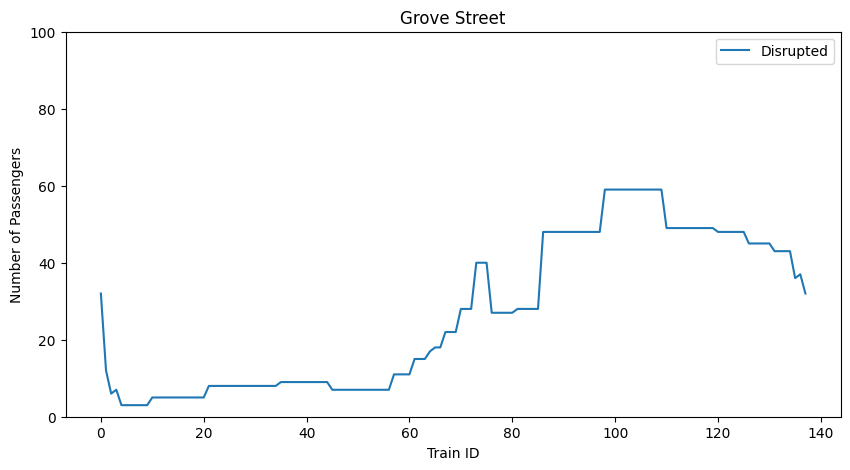

In [ ]:
plt.figure(figsize=(10, 5))
plt.ylim(0, 100)
plt.plot(df5[dusruptedStation], label='Disrupted')
plt.title(dusruptedStation)
plt.xlabel('Train ID')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

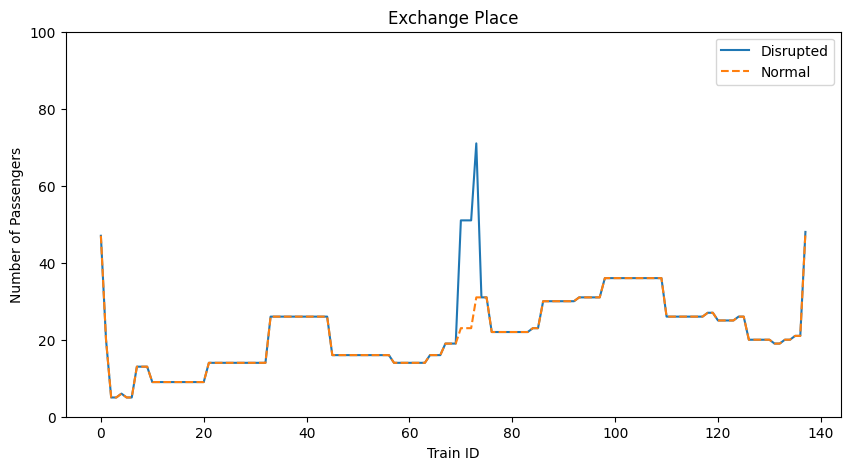

In [ ]:
plt.figure(figsize=(10, 5))
plt.ylim(0, 100)
plt.plot(df2[next], label='Disrupted')
plt.plot(df5[next], label='Normal', linestyle='--')
plt.title(next)
plt.xlabel('Train ID')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [ ]:
# data = dc(inCommuter)

# df1 = pd.DataFrame(data)


# df1.loc[AffectedTrains,dusruptedStation]

70    20
71    20
72    20
73    20
Name: Grove Street, dtype: int64

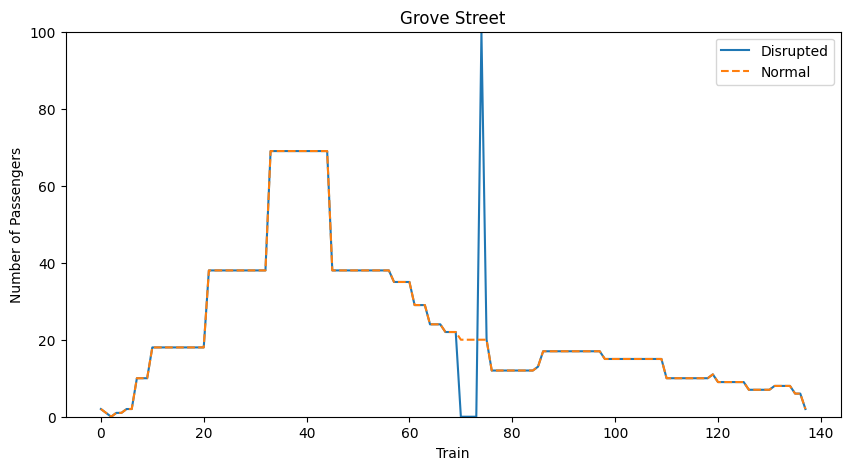

In [ ]:
plt.figure(figsize=(10, 5))
plt.ylim(0, 100)
plt.plot(df[dusruptedStation], label='Disrupted')
plt.plot(df1[dusruptedStation], label='Normal', linestyle='--')
plt.title(dusruptedStation)
plt.xlabel('Train')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

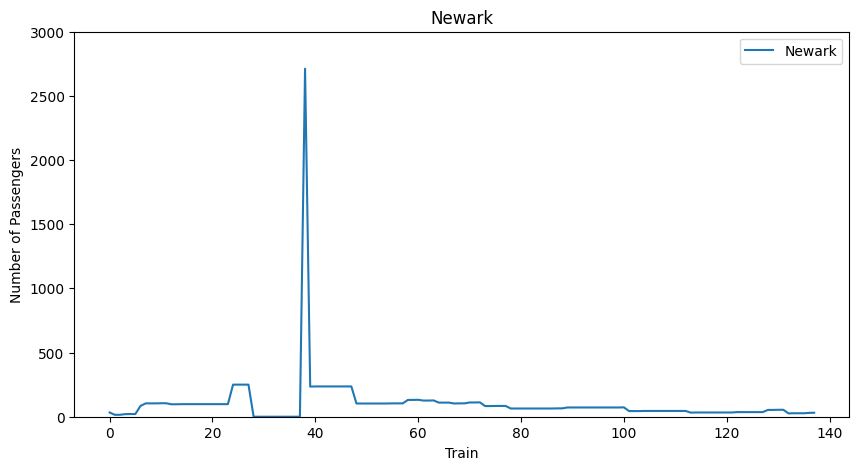

In [ ]:
plt.figure(figsize=(10, 5))
plt.ylim(0, 3000)
plt.plot(df[dusruptedStation], label=dusruptedStation)
plt.title(dusruptedStation)
plt.xlabel('Train')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

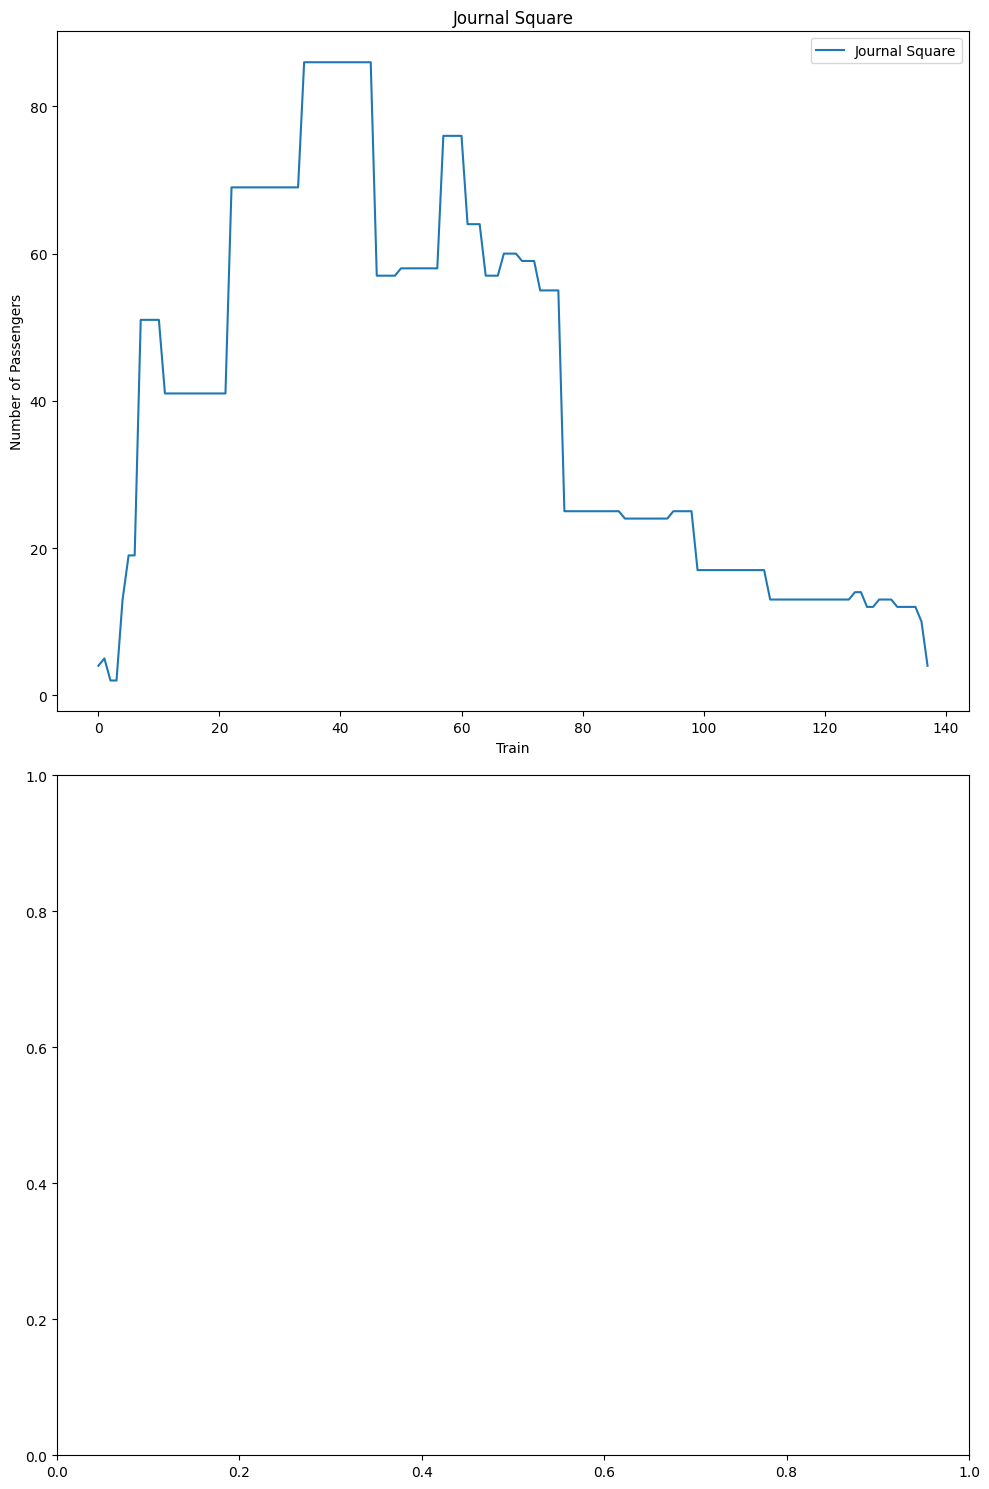

In [ ]:
data = inCommuter

df = pd.DataFrame(data)

# Plotting
fig, axs = plt.subplots(len(df.columns), 1, figsize=(10, 15))

for i, column in enumerate(df.columns):
    axs[i].plot(df[column], label=column)
    axs[i].set_title(column)
    axs[i].set_xlabel('Train')
    axs[i].set_ylabel('Number of Passengers')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
dusruptedStation

'Newark'

In [ ]:
# df.loc[AffectedTrains, dusruptedStation]

In [ ]:
# df.loc[AffectedTrains[-1]+1, dusruptedStation]

In [ ]:

# # Plotting
# fig, axs = plt.subplots(len(df.columns), 1, figsize=(10, 15))

# for i, column in enumerate(df.columns):
#     axs[i].plot(df[column], label=column)
#     axs[i].set_title(column)
#     axs[i].set_xlabel('Train')
#     axs[i].set_ylabel('Number of Passengers')
#     axs[i].legend()

# plt.tight_layout()
# plt.show()
